<a href="https://colab.research.google.com/github/jask89738/-Business-Intelligence-Coursera-Quiz-Answers/blob/main/SUSTAINABLE_FINANCE_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMPUTE GDP PER CAPITA

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"

df = pd.read_csv(url,usecols=['country', 'year', 'co2', 'co2_per_capita','gdp', 'population'])
df2=pd.read_csv(url)
# Compute GDP per capita
df['gdp_per_capita'] = df['gdp'] / df['population']


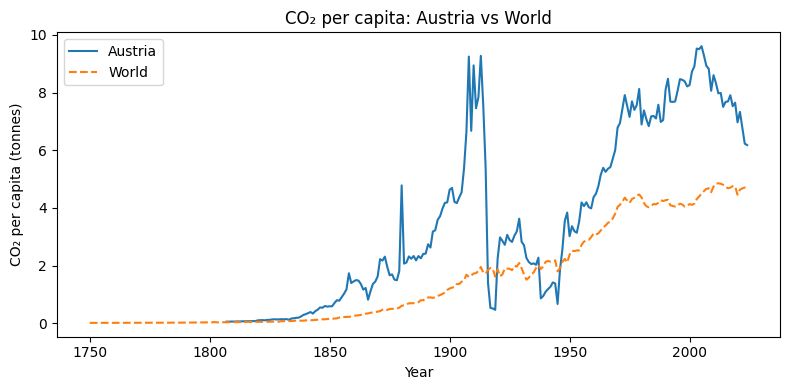

In [42]:
# Filter example
country = "Austria"
df_country = df[df['country'] == country].dropna(subset=['co2_per_capita'])
df_world = df[df['country'] == 'World'].dropna(subset=['co2_per_capita'])

plt.figure(figsize=(8,4))
plt.plot(df_country['year'], df_country['co2_per_capita'], label=country)
plt.plot(df_world['year'], df_world['co2_per_capita'], label='World', linestyle='--')
plt.xlabel("Year")
plt.ylabel("CO₂ per capita (tonnes)")
plt.title(f"CO₂ per capita: {country} vs World")
plt.legend()
plt.tight_layout()
plt.show()


CO2 EMISSIONS PER CAPITA


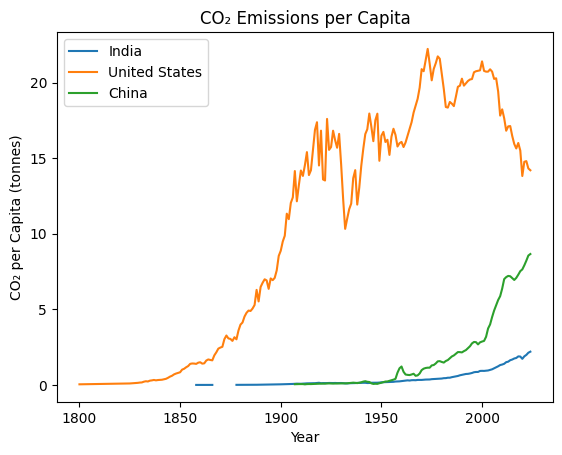

In [43]:
countries = ["India", "United States", "China"]

subset = df[df["country"].isin(countries)]

plt.figure()
for c in countries:
    temp = subset[subset["country"] == c]
    plt.plot(temp["year"], temp["co2_per_capita"], label=c)

plt.xlabel("Year")
plt.ylabel("CO₂ per Capita (tonnes)")
plt.title("CO₂ Emissions per Capita")
plt.legend()
plt.show()


MEASURING CARBON INTENSITY OF GDP


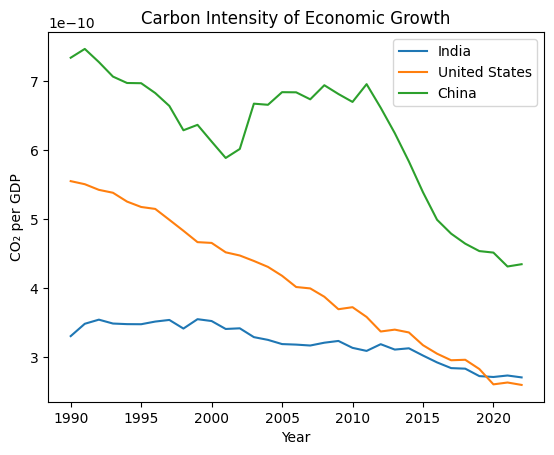

In [50]:
df2_no_missing = df2.dropna(subset=['co2', 'gdp']).copy()
df2_no_missing['CO2_by_GDP'] = df2_no_missing['co2'] / df2_no_missing['gdp']

intensity = df2_no_missing[
    (df2_no_missing["year"] >= 1990) &
    (df2_no_missing["country"].isin(countries))
]

plt.figure()
for c in countries:
    temp = intensity[intensity["country"] == c]
    plt.plot(temp["year"], temp["CO2_by_GDP"], label=c)

plt.xlabel("Year")
plt.ylabel("CO₂ per GDP")
plt.title("Carbon Intensity of Economic Growth")
plt.legend()
plt.show()

EMISSIONS BY FUEL SOURCE

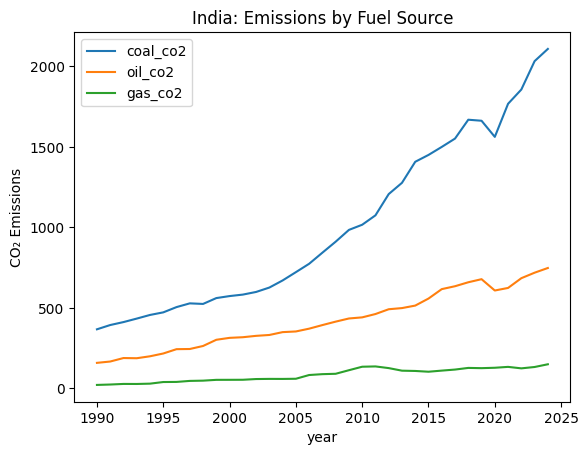

In [48]:
fuel_cols = ["coal_co2", "oil_co2", "gas_co2"]

fuel_data = (
    df2[(df2["country"] == "India") & (df2["year"] >= 1990)]
    [["year"] + fuel_cols]
    .set_index("year")
)

fuel_data.plot()
plt.ylabel("CO₂ Emissions")
plt.title("India: Emissions by Fuel Source")
plt.show()

VAR (VALUE AT RISK) OF A SINGLE STOCK

In [51]:
import yfinance as yf
import pandas as pd
import numpy as np

from scipy.stats import norm

aapl = yf.download(
    "AAPL",
    start="2025-01-01",
    interval="1d",
    auto_adjust=True
)

aapl = aapl[["Close"]]
aapl.columns = ["AAPL"]

norm.ppf(0.05)
apple_ret=np.log(aapl/aapl.shift(1)).dropna()
VaR_95=(apple_ret.mean()+norm.ppf(0.05)*apple_ret.std())
print(VaR_95)

[*********************100%***********************]  1 of 1 completed

AAPL   -0.032113
dtype: float64


HISTORICAL OR NON-PARAMETRIC VAR

In [52]:
np.quantile(apple_ret, 0.05)


np.float64(-0.03256052744097988)

VAR AND CVAR OF APPLE DATA


In [53]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm

# -----------------------------
# 1) Download DAILY prices
# -----------------------------
# 3) Parameters
# -----------------------------
alpha = 0.95

# -----------------------------
# 4) Historical VaR
# -----------------------------
var_hist = -np.percentile(returns, 100 * (1 - alpha))

# -----------------------------
# 5) Historical CVaR (Expected Shortfall)
# -----------------------------
# -----------------------------
tail_losses = returns[returns <= -var_hist]
cvar_hist = -tail_losses.mean()
cvar_hist = float(cvar_hist)  # make sure it's a scalar

# -----------------------------
# 6) Parametric VaR (Normal)
# -----------------------------
mu = returns.mean()
sigma = returns.std()
z = norm.ppf(1 - alpha)

var_param = float(-(mu + z * sigma))

# -----------------------------
# 7) Parametric CVaR (Normal)
# -----------------------------
cvar_param = float(-(mu + sigma * norm.pdf(z) / (1 - alpha)))

# -----------------------------
# 8) Report
# -----------------------------
print(f"Historical VaR (95%, 1-month): {var_hist:.4f}")
print(f"Historical CVaR (95%, 1-month): {cvar_hist:.4f}")
print(f"Parametric VaR (95%, 1-month): {var_param:.4f}")
print(f"Parametric CVaR (95%, 1-month): {cvar_param:.4f}")



Historical VaR (95%, 1-month): 0.0278
Historical CVaR (95%, 1-month): 0.0411
Parametric VaR (95%, 1-month): 0.0287
Parametric CVaR (95%, 1-month): -0.0369


/tmp/ipython-input-1368947692.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cvar_hist = float(cvar_hist)  # make sure it's a scalar
/tmp/ipython-input-1368947692.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  var_param = float(-(mu + z * sigma))
/tmp/ipython-input-1368947692.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cvar_param = float(-(mu + sigma * norm.pdf(z) / (1 - alpha)))


20 DAYS ROLLING VAR AND CVAR OF APPLE DATA


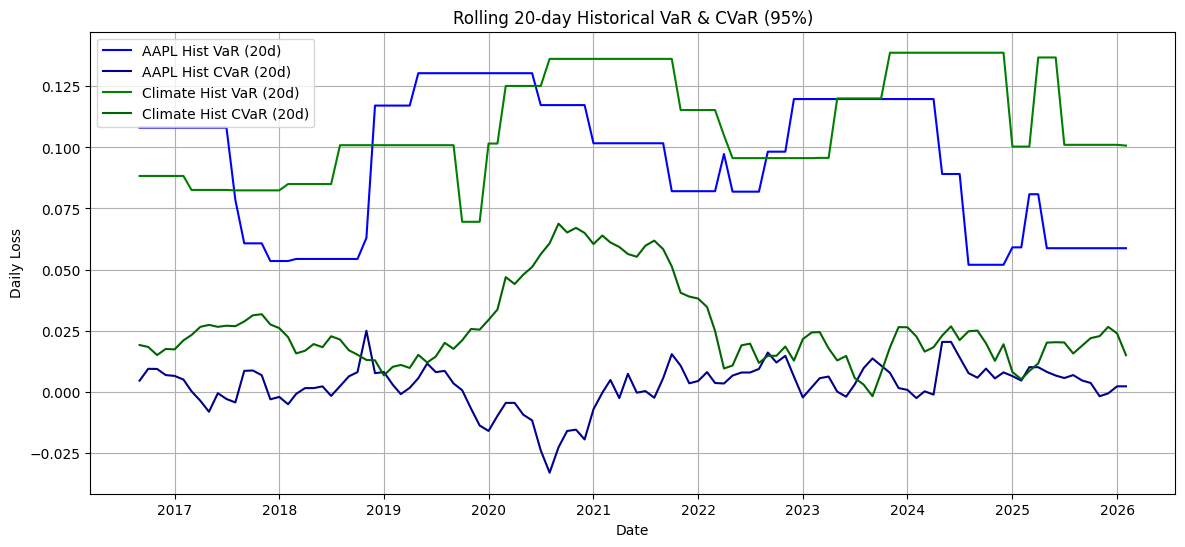

In [55]:

## 20 days Rolling VaR and CVaR of Apple and Climate Risk

alpha = 0.95
window = 20  # rolling window in days

# -----------------------------
# 4) Function to compute VaR & CVaR
# -----------------------------
def rolling_var_cvar(series, window, alpha=0.95):
    hist_var = series.rolling(window).apply(lambda x: -np.percentile(x, 100*(1-alpha)), raw=True)
    hist_cvar = series.rolling(window).apply(lambda x: -x[x <= -np.percentile(x, 100*(1-alpha))].mean() if len(x[x <= -np.percentile(x, 100*(1-alpha))])>0 else np.nan, raw=False)

    # Parametric
    param_var = series.rolling(window).apply(lambda x: -(x.mean() + norm.ppf(1-alpha)*x.std()), raw=True)
    param_cvar = series.rolling(window).apply(lambda x: -(x.mean() + x.std()*norm.pdf(norm.ppf(1-alpha))/(1-alpha)), raw=True)

    return hist_var, hist_cvar, param_var, param_cvar

# -----------------------------
# 5) Compute rolling VaR/CVaR
# -----------------------------
rolling_results = {}
for col in ["AAPL", "CLIMATE"]:
    hist_var, hist_cvar, param_var, param_cvar = rolling_var_cvar(df_jensen[col], window, alpha)
    rolling_results[col+"_HistVaR"] = hist_var
    rolling_results[col+"_HistCVaR"] = hist_cvar
    rolling_results[col+"_ParamVaR"] = param_var
    rolling_results[col+"_ParamCVaR"] = param_cvar

rolling_df = pd.DataFrame(rolling_results, index=df_jensen.index)

# -----------------------------
# 6) Plot Rolling VaR & CVaR
# -----------------------------
plt.figure(figsize=(14,6))
plt.plot(rolling_df["AAPL_HistVaR"], label="AAPL Hist VaR (20d)", color="blue")
plt.plot(rolling_df["AAPL_HistCVaR"], label="AAPL Hist CVaR (20d)", color="darkblue")
plt.plot(rolling_df["CLIMATE_HistVaR"], label="Climate Hist VaR (20d)", color="green")
plt.plot(rolling_df["CLIMATE_HistCVaR"], label="Climate Hist CVaR (20d)", color="darkgreen")
plt.title("Rolling 20-day Historical VaR & CVaR (95%)")
plt.ylabel("Daily Loss")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


COMPUTE CLIMATE FACTOR


In [56]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm

# -----------------------------
# 1) Download daily prices
# -----------------------------
start = "2020-01-01"

aapl = yf.download("AAPL", start=start, interval="1d", auto_adjust=True)["Close"]
xle  = yf.download("XLE", start=start, interval="1d", auto_adjust=True)["Close"]
xlk  = yf.download("XLK", start=start, interval="1d", auto_adjust=True)["Close"]

# -----------------------------
# 2) Compute daily returns
# -----------------------------
aapl_ret    = aapl.pct_change()
energy_ret  = xle.pct_change()
tech_ret    = xlk.pct_change()

# Align dates
df = pd.concat([aapl_ret, energy_ret, tech_ret], axis=1, join="inner")
df.columns = ["AAPL", "ENERGY", "TECH"]

# Compute Climate factor
df["CLIMATE"] = df["ENERGY"] - df["TECH"]

# Drop any remaining NaNs
df = df.dropna()

# -----------------------------
# 3) Parameters
# -----------------------------
alpha = 0.95

# -----------------------------
# 4) Function to compute VaR & CVaR
# -----------------------------
def compute_var_cvar(series, alpha=0.95):
    if len(series) == 0:
        return np.nan, np.nan, np.nan, np.nan
    # Historical
    hist_var = -np.percentile(series.values, 100*(1-alpha))
    tail_losses = series[series <= -hist_var]
    hist_cvar = -tail_losses.mean()
    # Parametric (Normal)
    mu = series.mean()
    sigma = series.std()
    z = norm.ppf(1 - alpha)
    param_var = -(mu + z * sigma)
    param_cvar = -(mu + sigma * norm.pdf(z)/(1-alpha))
    return hist_var, hist_cvar, param_var, param_cvar

# -----------------------------
# 5) Compute for AAPL and CLIMATE
# -----------------------------
results = []
for col in ["AAPL", "CLIMATE"]:
    hist_var, hist_cvar, param_var, param_cvar = compute_var_cvar(df[col], alpha)
    results.append({
        "Asset": col,
        "Hist_VaR_95%": hist_var,
        "Hist_CVaR_95%": hist_cvar,
        "Param_VaR_95%": param_var,
        "Param_CVaR_95%": param_cvar
    })

df_results = pd.DataFrame(results)
print(df_results)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

     Asset  Hist_VaR_95%  Hist_CVaR_95%  Param_VaR_95%  Param_CVaR_95%
0     AAPL      0.030704       0.044512       0.031762       -0.042258
1  CLIMATE      0.032578       0.046109       0.035421       -0.044112


PLOT FOR CLIMATE FACTOR


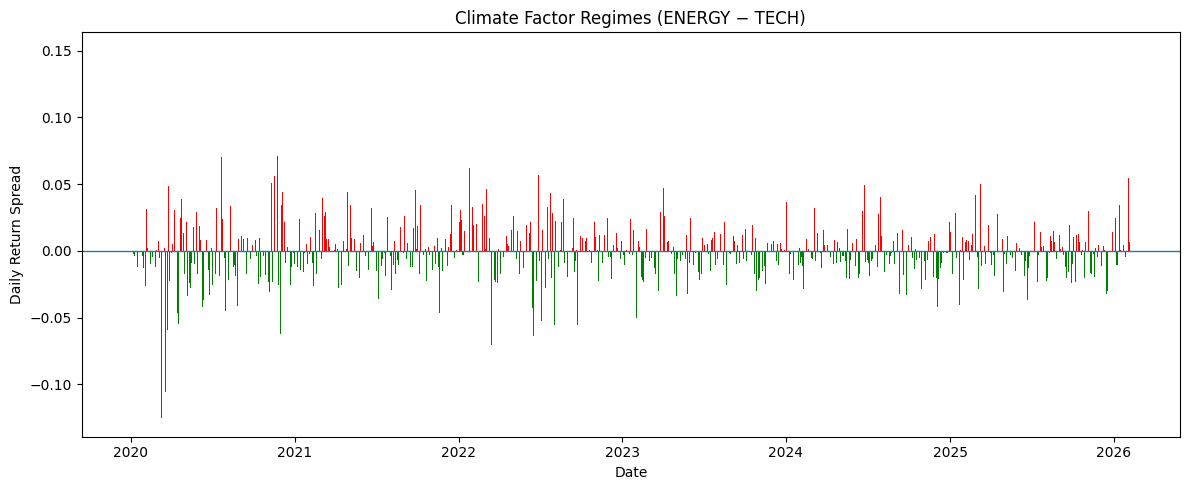

In [57]:
import matplotlib.pyplot as plt

climate = df["CLIMATE"].dropna()

colors = ["green" if x <= 0 else "red" for x in climate]

plt.figure(figsize=(12,5))

plt.bar(
    climate.index,
    climate,
    color=colors
)

plt.axhline(0, linewidth=1)

plt.title("Climate Factor Regimes (ENERGY − TECH)")
plt.ylabel("Daily Return Spread")
plt.xlabel("Date")

plt.tight_layout()
plt.show()


USING CLIMATE PROXY DETERMINING CLIMATE TRANSITION RISK


In [58]:
climate = df["CLIMATE"].dropna()

sign_counts = pd.Series(
    pd.cut(
        climate,
        bins=[-float("inf"), 0, float("inf")],
        labels=["CLIMATE ≤ 0", "CLIMATE > 0"],
        right=True
    )
).value_counts()

sign_counts


,count
CLIMATE,
CLIMATE ≤ 0,786
CLIMATE > 0,746


COMPUTE CLIMATE BETA AND STANDARD DEVIATION

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm

X = sm.add_constant(df["CLIMATE"])
y = df["AAPL"]

model = sm.OLS(y, X).fit()
beta_clim = model.params["CLIMATE"]
resid_std = model.resid.std()

print("Climate beta:", beta_clim)
print("Standard Dev:", resid_std)


Climate beta: -0.30123740642769903
Standard Dev: 0.0188898612411945


In [60]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm

# -----------------------------
# 1) Download daily prices
# -----------------------------
start = "2020-01-01"

ntpc = yf.download("NTPC.NS", start=start, interval="1d", auto_adjust=True)["Close"]
xle  = yf.download("XLE", start=start, interval="1d", auto_adjust=True)["Close"]
xlk  = yf.download("XLK", start=start, interval="1d", auto_adjust=True)["Close"]

# -----------------------------
# 2) Compute daily returns
# -----------------------------
ntpc_ret    = ntpc.pct_change()
energy_ret  = xle.pct_change()
tech_ret    = xlk.pct_change()

# Align dates
df = pd.concat([ntpc_ret, energy_ret, tech_ret], axis=1, join="inner")
df.columns = ["NTPC", "ENERGY", "TECH"]

# Compute Climate factor
df["CLIMATE"] = df["ENERGY"] - df["TECH"]

# Drop any remaining NaNs
df = df.dropna()

# -----------------------------
# 3) Parameters
# -----------------------------

alpha = 0.95



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLIMATE STRESSED VAR

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm

X = sm.add_constant(df["CLIMATE"])
y = df["NTPC"]

model = sm.OLS(y, X).fit()
beta_clim = model.params["CLIMATE"]
resid_std = model.resid.std()

print("Climate beta:", beta_clim)
print("Standard Dev:", resid_std)


alpha = 0.99
z = norm.ppf(1 - alpha)   # left tail

mu = df["NTPC"].mean()
sigma = df["NTPC"].std()

VaR_baseline = -(mu + z * sigma)
VaR_baseline


climate_stress = df["CLIMATE"].quantile(0.01)
climate_stress


mu_stressed = beta_clim * climate_stress

VaR_climate = -(mu_stressed + z * resid_std)
VaR_climate


pd.DataFrame({
    "Baseline VaR (99%)": [VaR_baseline],
    "Climate-stressed VaR (99%)": [VaR_climate]
})




Climate beta: 0.07271011737155317
Standard Dev: 0.017807185585717762


,Baseline VaR (99%),Climate-stressed VaR (99%)
0,0.040438,0.045318


EXCESS MARKET RETURN (JENSEN ALPHA WITHOUT CLIMATE STRESS)

In [62]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

# =========================
# 1. Download asset prices
# =========================
aapl = yf.download("AAPL", start="2015-01-01", interval="1mo", auto_adjust=True)["Close"]
mkt  = yf.download("^GSPC", start="2015-01-01", interval="1mo", auto_adjust=True)["Close"]
xle  = yf.download("XLE", start="2015-01-01", interval="1mo", auto_adjust=True)["Close"]
xlk  = yf.download("XLK", start="2015-01-01", interval="1mo", auto_adjust=True)["Close"]

# =========================
# 2. Monthly returns
# =========================
df = pd.concat([aapl, mkt, xle, xlk], axis=1)
df.columns = ["AAPL", "MKT", "XLE", "XLK"]

df = df.pct_change().dropna()

# =========================
# 3. Risk-free rate (proxy: 3M T-bill ~ 0.02% monthly)
# =========================
df["RF"] = 0.0002   # simple constant proxy for MBA exercise

# =========================
# 4. Climate factor
# =========================
df["CLIMATE"] = df["XLE"] - df["XLK"]

# =========================
# 5. Excess returns
# =========================
df["AAPL_excess"] = df["AAPL"] - df["RF"]
df["MKT_excess"]  = df["MKT"]  - df["RF"]

# =========================
# 6. OLS Regression - First with Rm-Rf only
# =========================
X = sm.add_constant(df["MKT_excess"])
y = df["AAPL_excess"]

model = sm.OLS(y, X).fit()

print(model.summary())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                            OLS Regression Results                            
Dep. Variable:            AAPL_excess   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     99.92
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           7.84e-18
Time:                        06:20:58   Log-Likelihood:                 188.83
No. Observations:                 133   AIC:                            -373.7
Df Residuals:                     131   BIC:                            -367.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.005      1.648      0.1

JENSEN ALPHA WITH CLIMATE STRESS


In [63]:
X = sm.add_constant(df[["MKT_excess", "CLIMATE"]])
y = df["AAPL_excess"]

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            AAPL_excess   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     69.76
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           2.62e-21
Time:                        06:21:24   Log-Likelihood:                 199.61
No. Observations:                 133   AIC:                            -393.2
Df Residuals:                     130   BIC:                            -384.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.005      1.305      0.1